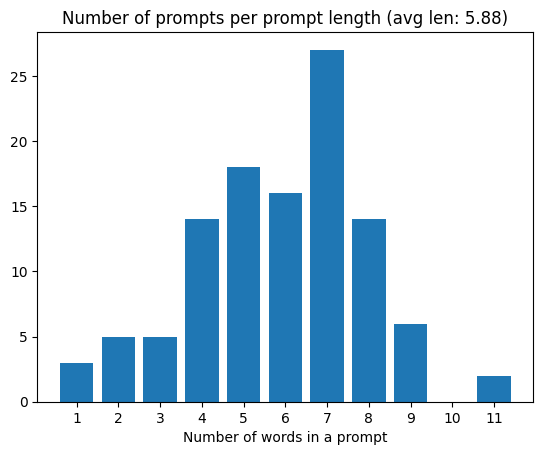

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

final_queries = pd.read_csv("../Data/Queries_IT_final.csv")

query_lengths = final_queries.query_len.value_counts().sort_index().keys().tolist()
query_len_counts = final_queries.query_len.value_counts().sort_index().values.tolist()
# print(query_lengths, query_len_counts)

fig = plt.figure()
ax = plt.bar(query_lengths, query_len_counts)
plt.xticks(list(range(min(query_lengths), max(query_lengths)+1)))
plt.xlabel("Number of words in a prompt")
plt.title("Number of prompts per prompt length (avg len: " + str(round(np.average(final_queries.query_len), 2)) + ")")
plt.show()